# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
import keras_tuner as kt

df='train.csv'
df=pd.read_csv('train.csv')
display(pd.DataFrame(df))

# Display the first few rows of the dataset to understand its structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


# 1.Imputing missing values

In [3]:
# Step 1: Identify values in Age starting with '0.' and treat them as missing
# Convert those values to NaN
df.loc[df['Age'].astype(str).str.startswith('0.'), 'Age'] = pd.NA
# Step 2: Handle missing values in Age (including those we just marked as missing)
# Use the median to fill missing values
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Verify that the '0.' values have been handled
print(df['Age'].head(20))  # Display the first 20 rows to check

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     28.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    28.0
18    31.0
19    28.0
Name: Age, dtype: float64


In [4]:
# Create an imputer object with a median filling strategy
age_imputer = SimpleImputer(strategy='median')

# Apply the imputer to the Age column
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Check to make sure there are no more missing values in Age
print(df['Age'].isnull().sum())


0


In [5]:
#Handling missing values in Embark column
# Fill missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check to make sure there are no more missing values in Embarked
print(df['Embarked'].isnull().sum())

0


In [6]:
#Verify that All Missing Values Are Handled
# Check again for missing values
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
print(missing_values[missing_values > 0])

Cabin    687
dtype: int64


# 2.Drop Unnecessary Columns

In [7]:
#Handling Missing Values in the Cabin Column
# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Verify that the Cabin column is dropped
print('Cabin' in df.columns)

False


In [8]:
df.drop(columns=['Name','PassengerId','Ticket'], inplace=True)

# 3.One Hot Encoding

In [9]:
#One-Hot Encoding for the Embarked Column
# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Verify the encoding
print(df.head(10))


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0         0       3    male  22.0      1      0   7.2500       False   
1         1       1  female  38.0      1      0  71.2833       False   
2         1       3  female  26.0      0      0   7.9250       False   
3         1       1  female  35.0      1      0  53.1000       False   
4         0       3    male  35.0      0      0   8.0500       False   
5         0       3    male  28.0      0      0   8.4583        True   
6         0       1    male  54.0      0      0  51.8625       False   
7         0       3    male   2.0      3      1  21.0750       False   
8         1       3  female  27.0      0      2  11.1333       False   
9         1       2  female  14.0      1      0  30.0708       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
5       False  
6        True  
7        True  
8        True  
9       False  


# 4.Label Encoding

In [10]:
#Label Encoding for the Sex Column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])

# Verify the encoding
print(df[['Sex']].head(10))

   Sex
0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0


# 5.Changing Datatype and Observe Correlation

In [11]:
df = df.astype(int)

In [12]:
df.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Sex          -0.543351
Age          -0.044404
SibSp        -0.035322
Parch         0.081629
Fare          0.257482
Embarked_Q    0.003650
Embarked_S   -0.149683
Name: Survived, dtype: float64

# Visualisation

<Axes: xlabel='Pclass', ylabel='Survived'>

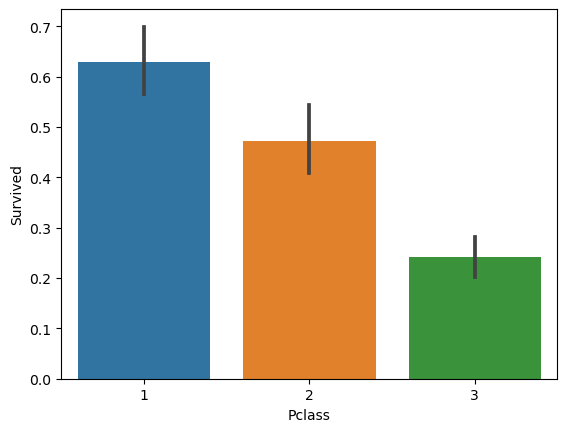

In [6]:
sns.barplot(x='Pclass', y='Survived', data=df) # high proportion of survivors

<Axes: xlabel='Sex', ylabel='Survived'>

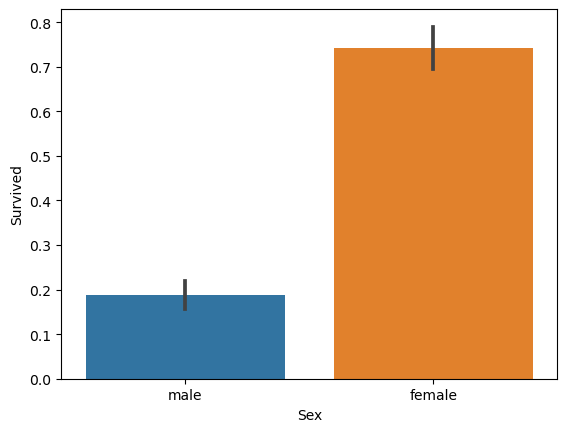

In [7]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

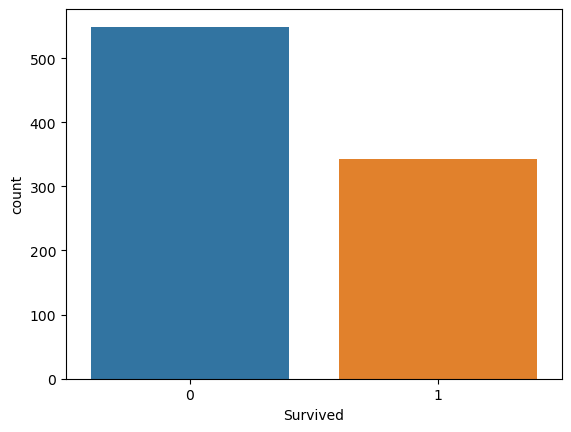

In [8]:
sns.countplot(x='Survived',data=df)

Text(0.5, 1.0, 'Fare Distribution')

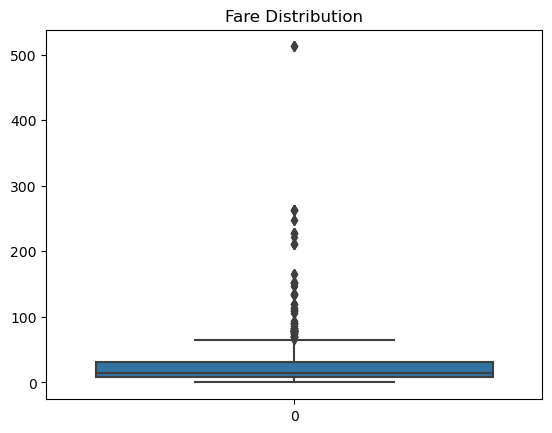

In [24]:
sns.boxplot(df['Fare'])
plt.title('Fare Distribution')

C:\Users\hp\AppData\Local\Temp\ipykernel_18916\178786589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

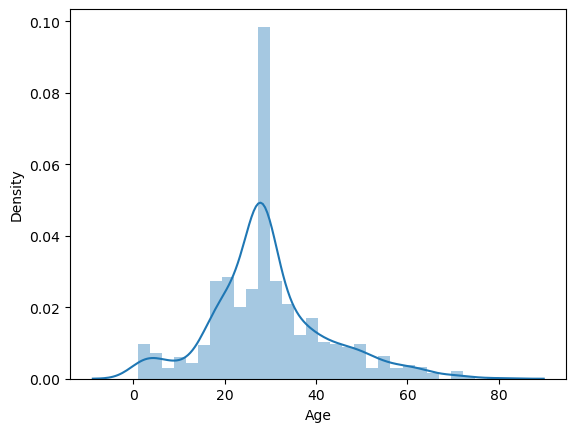

In [17]:
# Age column
sns.distplot(df['Age'])

Text(0.5, 1.0, 'Survival Count')

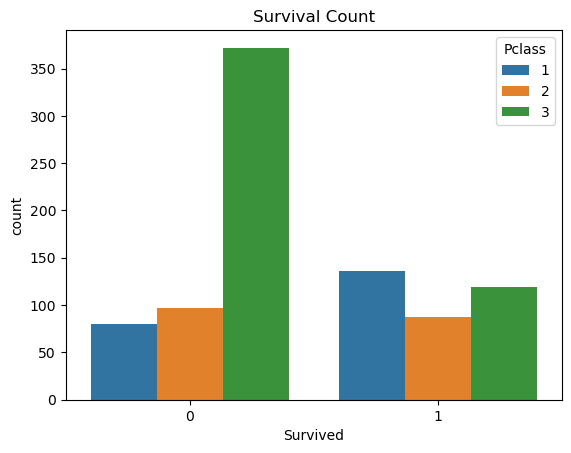

In [25]:
sns.countplot(x='Survived',data=df,hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda x: round((x/x.sum())*100,1),axis=1)
plt.title('Survival Count')

Text(0.5, 1.0, 'Survival Count by Sex')

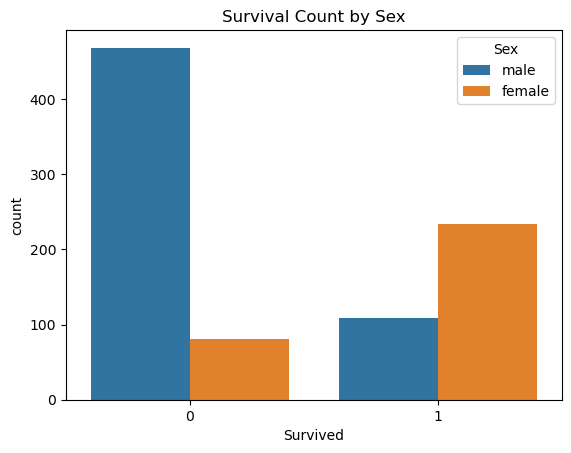

In [26]:
# Survival with Sex
sns.countplot(x='Survived',data=df,hue=df['Sex'])
pd.crosstab(df['Pclass'],df['Sex']).apply(lambda x: round((x/x.sum())*100,1),axis=1)
plt.title('Survival Count by Sex')

C:\Users\hp\AppData\Local\Temp\ipykernel_18916\3750674864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18916\3750674864.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

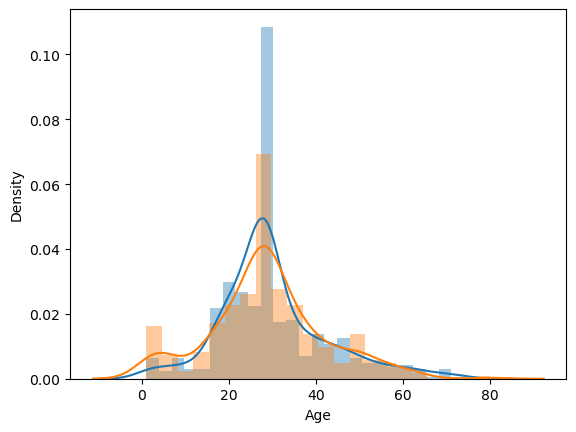

In [23]:
# Survived with age
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

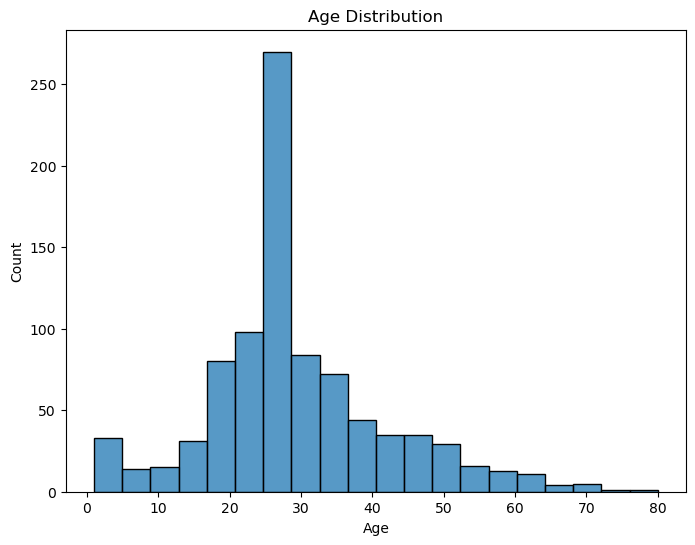

In [10]:
#age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=20)
plt.title('Age Distribution')
plt.show()

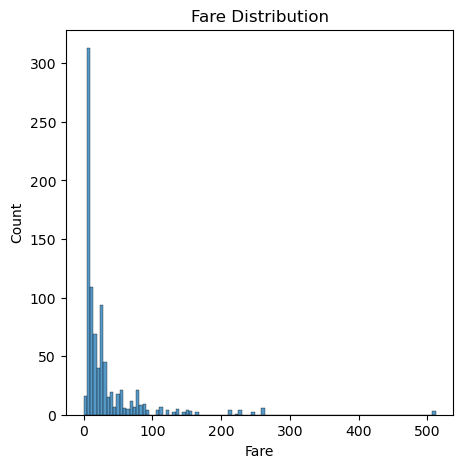

In [28]:
#fare distribution
plt.figure(figsize=(5,5))
sns.histplot(df['Fare'])
plt.title('Fare Distribution')
plt.show()

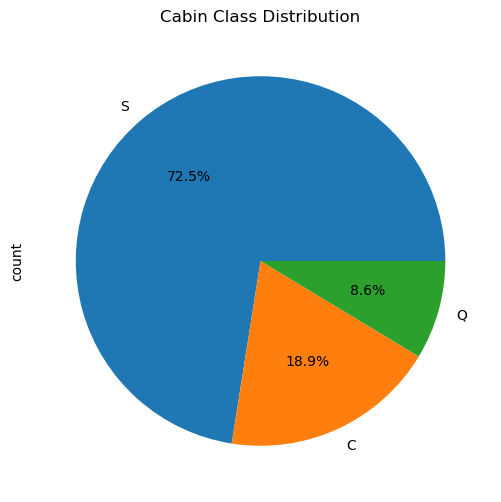

In [19]:
plt.figure(figsize=(8,6))
cabin = df['Embarked'].value_counts()
cabin.plot(kind='pie',autopct='%1.1f%%')
plt.title('Cabin Class Distribution')
plt.show()

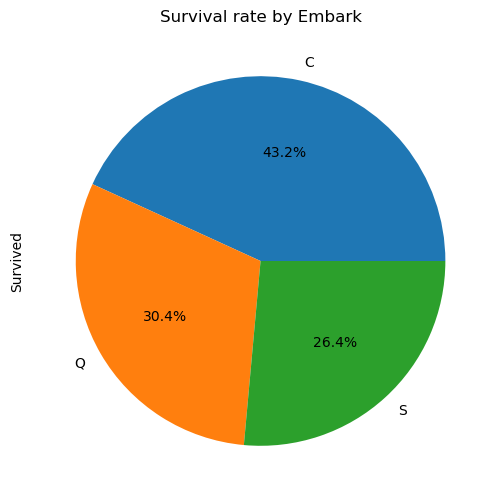

In [23]:
plt.figure(figsize=(8,6))
survive = df['Survived'].groupby(df['Embarked']).mean()
survive.plot(kind='pie',autopct='%1.1f%%')
plt.title('Survival rate by Embark')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


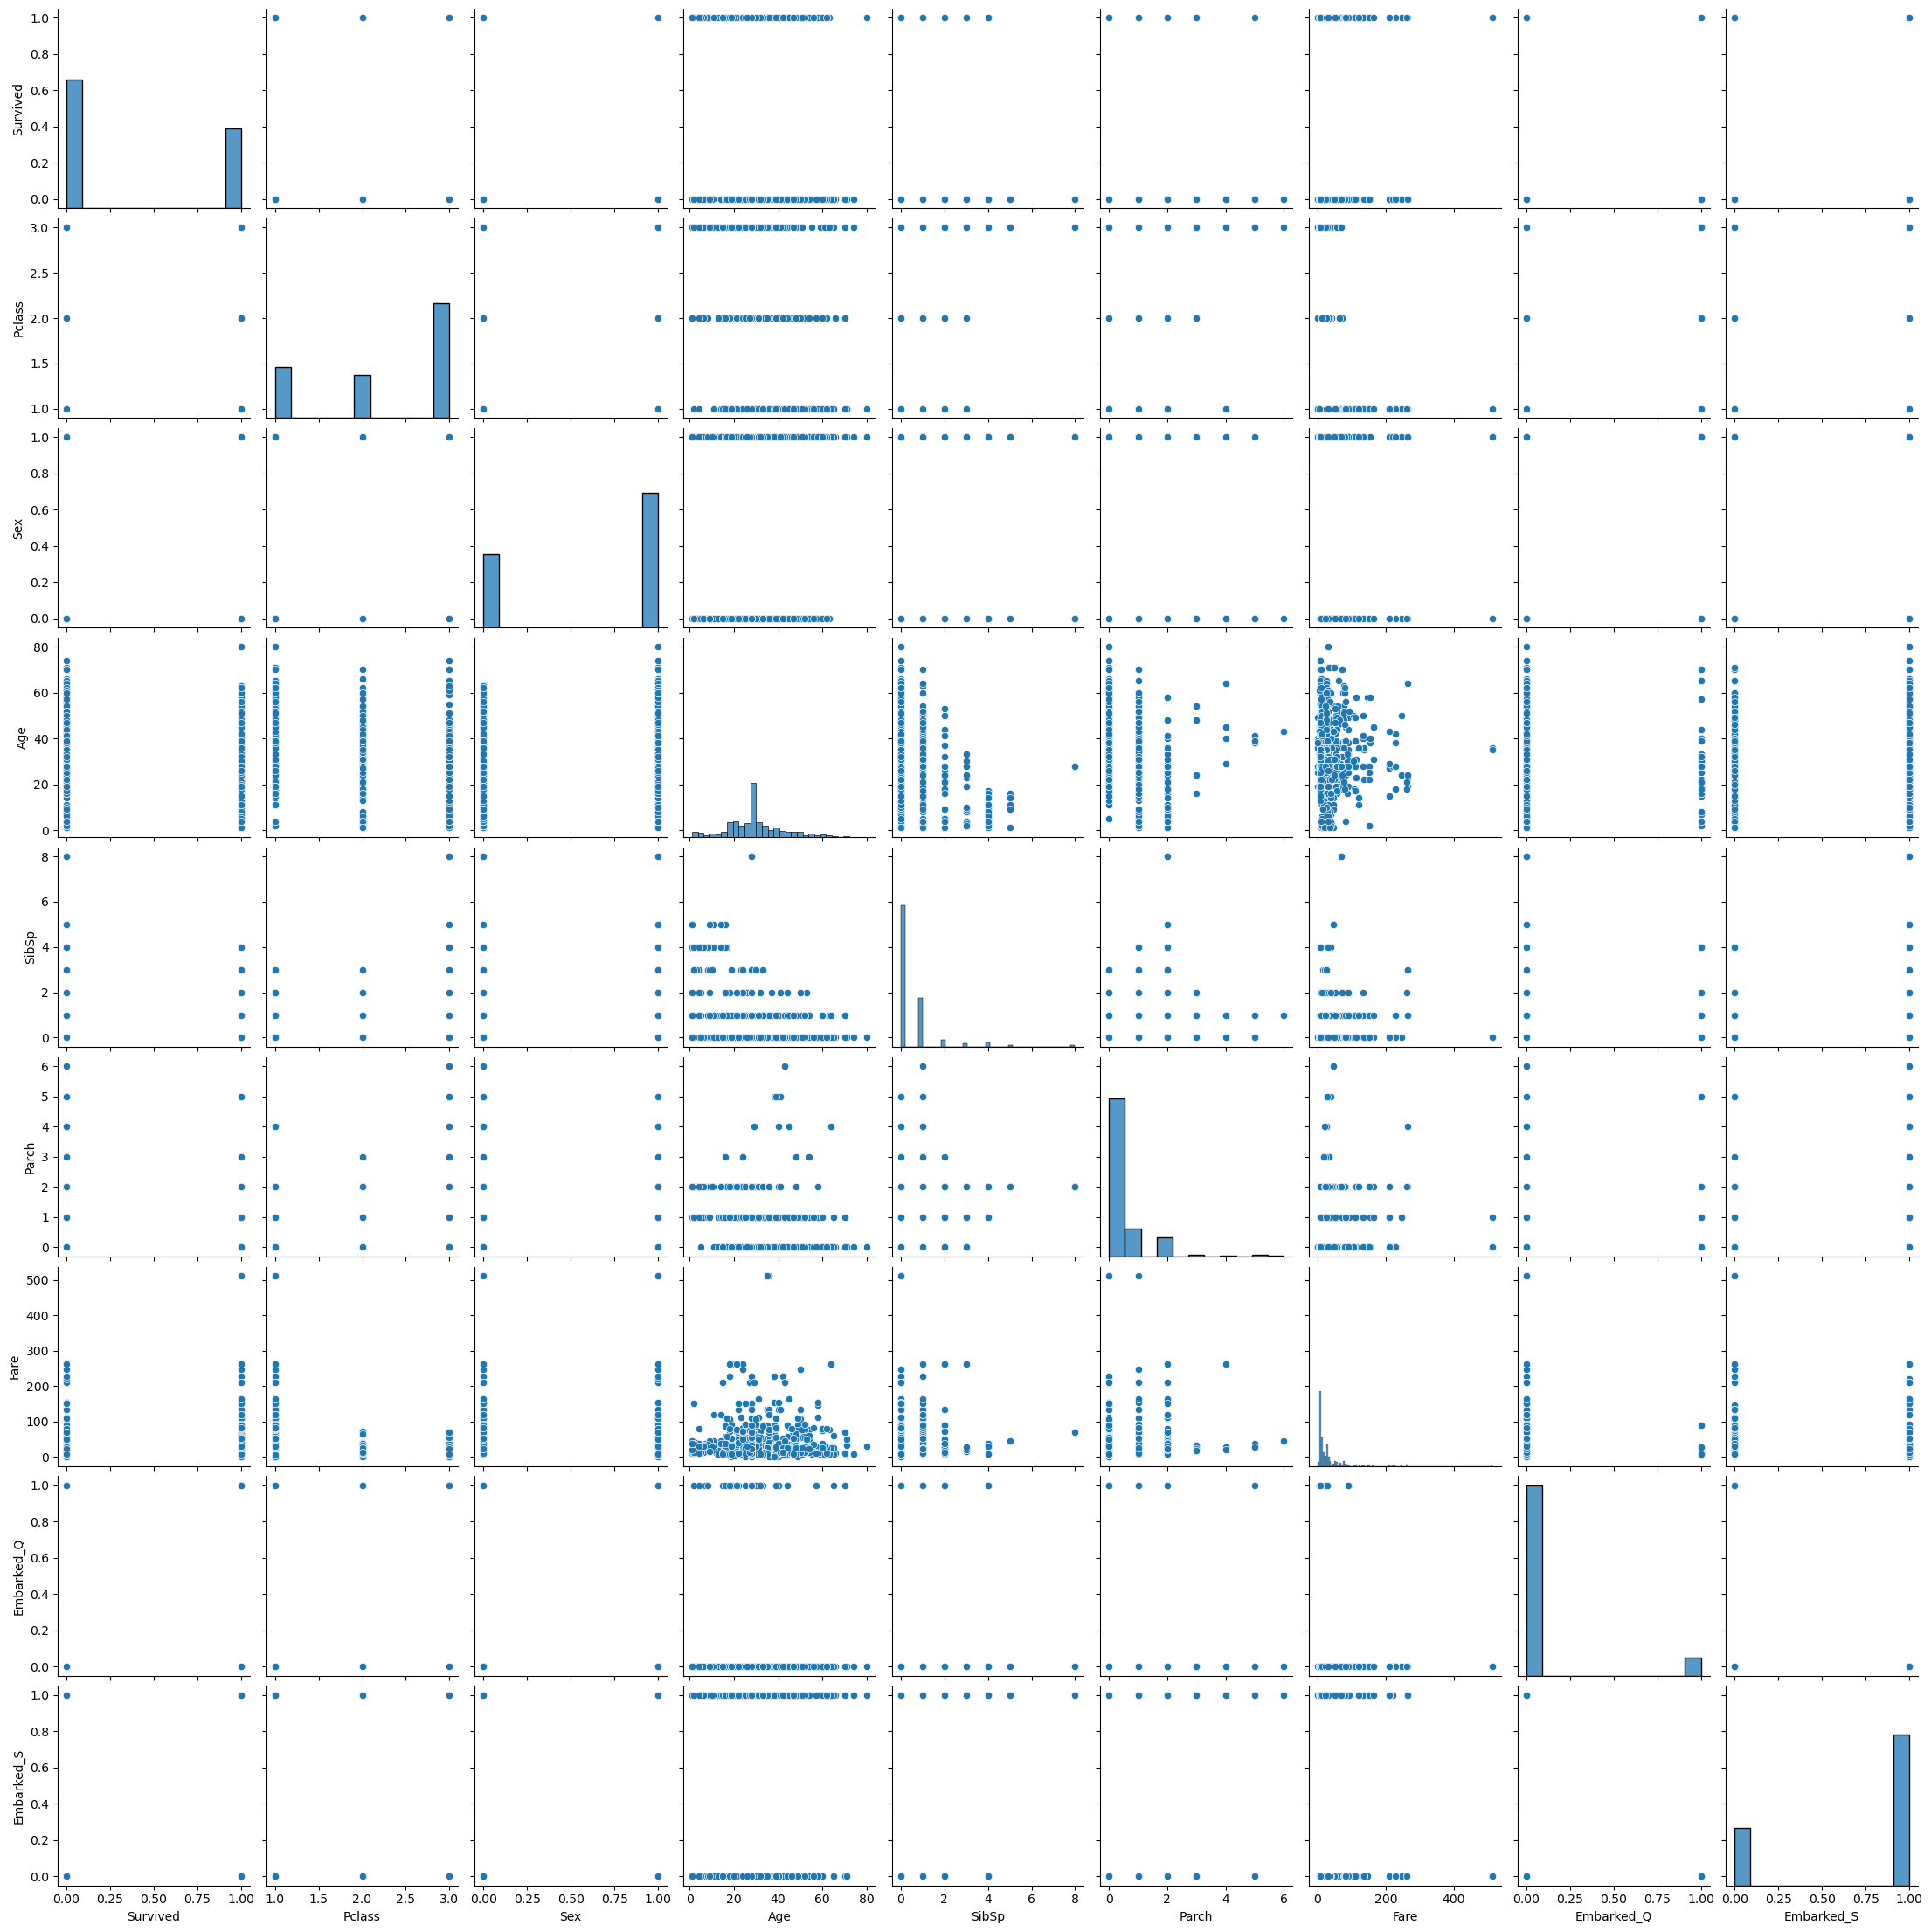

In [24]:
sns.pairplot(df)

# Train Test Split

In [13]:
X = df.iloc[:,1::]
y = df['Survived']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Scaling

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Testing Models

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       107
           1       0.89      0.71      0.79        72

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



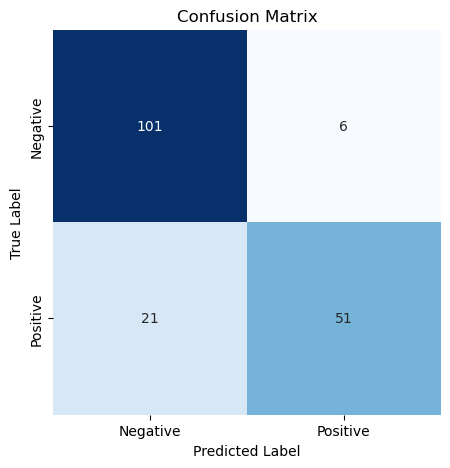

In [17]:
lr_model = LogisticRegression()
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       107
           1       0.94      0.68      0.79        72

    accuracy                           0.85       179
   macro avg       0.88      0.83      0.84       179
weighted avg       0.87      0.85      0.85       179



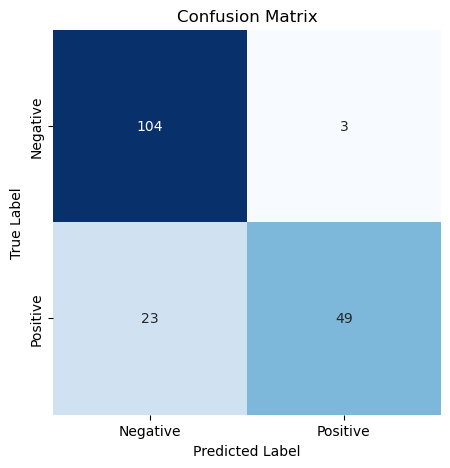

None


In [18]:
svm_model = SVC()
print(evaluate_model(svm_model, X_train, X_test, y_train, y_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       107
           1       0.78      0.72      0.75        72

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



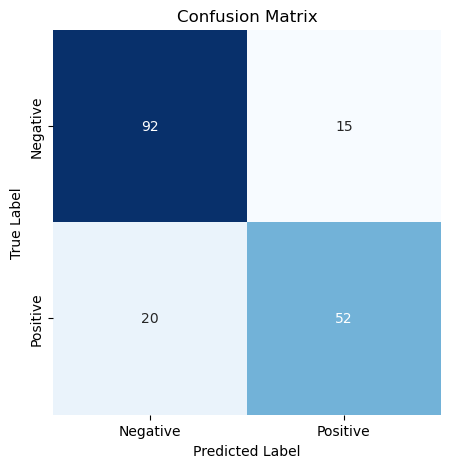

In [19]:
bnb_model = BernoulliNB()
evaluate_model(bnb_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.87      0.75      0.81        72

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.84       179
weighted avg       0.86      0.85      0.85       179



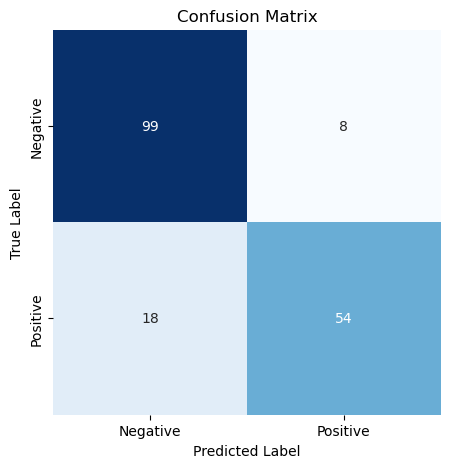

In [20]:
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.77      0.74      0.75        72

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



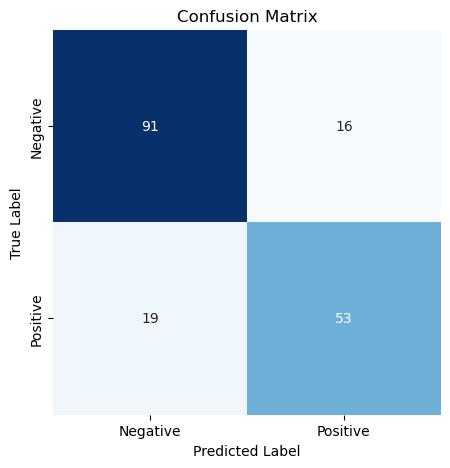

In [21]:
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.81      0.76      0.79        72

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



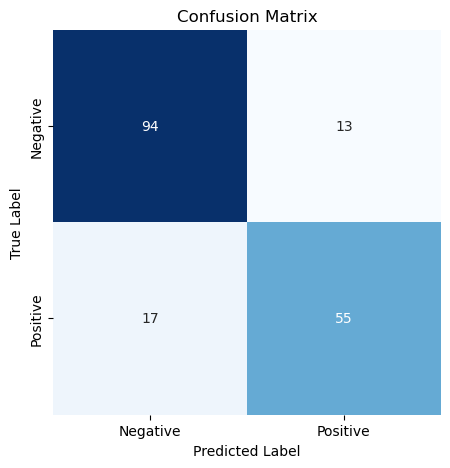

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Grid Search CV

In [48]:
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


In [49]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,verbose=2,scoring='accuracy' )

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [50]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.89      0.75      0.81        72

    accuracy                           0.86       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



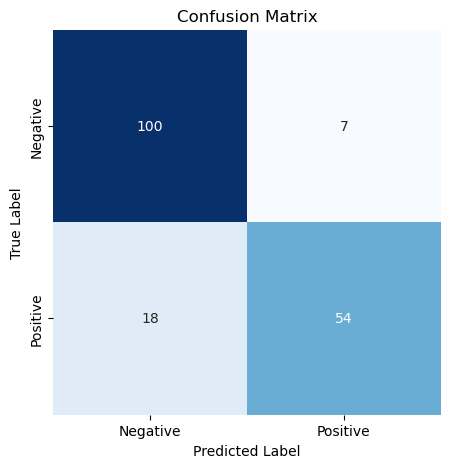

In [23]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10
)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [26]:
param_grid = {
    'penalty':['l1','l2'],
    'C':[0.1,1,5,10],
    'max_iter':[100,500,1000],
    'solver':['newton_cg','lbfgs','liblinear']
}

In [27]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,verbose=2,scoring='accuracy' )

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton_cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton_cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton_cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton_cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton_cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, sol

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramet

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=2)

In [28]:
grid_search.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       107
           1       0.89      0.71      0.79        72

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



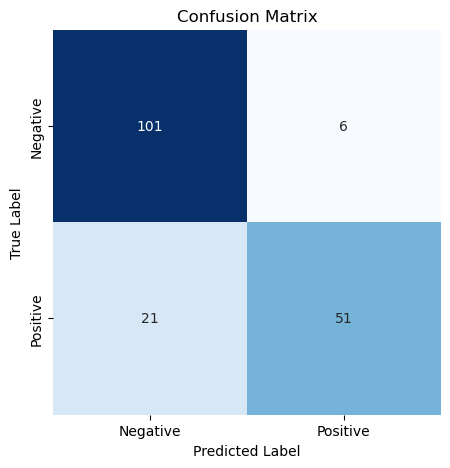

In [29]:
lr_model = LogisticRegression(
    C = 0.1,
    max_iter = 100,
    penalty = 'l2',
    solver = 'lbfgs'
)
evaluate_model(lr_model,X_train,X_test,y_train,y_test)

# Artificial Neural Network

In [45]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=8))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,681 (61.25 KB)

 Trainable params: 15,681 (61.25 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True) 

In [84]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6428 - loss: 0.6593 - val_accuracy: 0.7542 - val_loss: 0.5278
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.5175 - val_accuracy: 0.7989 - val_loss: 0.4516
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7854 - loss: 0.4573 - val_accuracy: 0.7989 - val_loss: 0.4409
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8205 - loss: 0.4232 - val_accuracy: 0.7989 - val_loss: 0.4347
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.4119 - val_accuracy: 0.7989 - val_loss: 0.4435
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.4077 - val_accuracy: 0.8101 - val_loss: 0.4372
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8250 - loss: 0.4161 - val_accuracy: 0.8101 - val_loss: 0.4448
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8572 - loss: 0.3646 - val_accuracy: 0.8156 - 

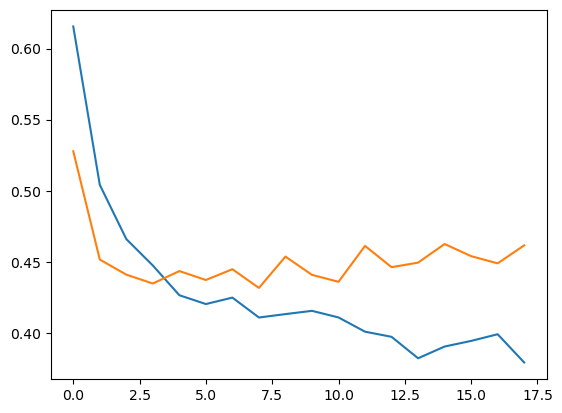

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

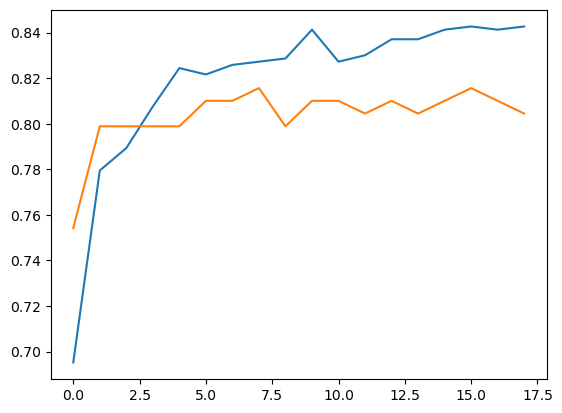

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])